In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")


In [4]:
sns.set(style="whitegrid")

In [5]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'dockQ',
       'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long', 'med',
       'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA', 'longB',
       'medB', 'longPPVB', 'medPPVB', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

In [6]:
df


,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,longPPVA,medPPVA,longB,medB,longPPVB,medPPVB,auc,evalue,seqid,rank
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,0.948,0.980,658,116,0.985,0.966,0.40,9999.0,0.0,1
1,1ay7_u2_A-1ay7_u1_A,-N 3 --cpu 8,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,0.986,0.966,668,150,0.960,0.987,0.36,9999.0,0.0,2
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733.0,1484,2034,0.222,0.120,4.427,...,0.973,0.975,642,113,0.992,0.965,0.41,4.3,50.0,1
3,1b27_u2_A-1b27_u1_A,-N 3 --cpu 8,90,109,733.0,2034,1484,0.231,0.160,4.840,...,0.992,0.964,769,154,0.971,0.981,0.46,4.3,50.0,2
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,0.993,0.987,850,92,0.996,1.000,0.00,9999.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14304,5eg3_u1_A-5eg3_u2_A,TMdock,303,105,NaN,NaN,NaN,0.003,0.000,34.319,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,5
14305,5eg3_u1_A-5eg3_u2_A,TMdock,303,105,NaN,NaN,NaN,0.004,0.000,29.484,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,6
14306,5eg3_u1_A-5eg3_u2_A,TMdock,303,105,NaN,NaN,NaN,0.007,0.000,17.932,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,7
14307,5eg3_u1_A-5eg3_u2_A,TMdock,303,105,NaN,NaN,NaN,0.015,0.000,19.586,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,8


In [8]:
df.JHparams.unique()
goodmodels=["1ay7","1b27","1bdj","1ewy","1gpw","1lb2","2a41","2ejf","2hqs","2hrk","2nxn",
            "2o8v","2zae","3a8i","3d3c","3lb8","3oun","3pro","4bmp","4etw","4gmj","4llo","5brr"]


In [9]:
df2=df.loc[ (df.JHparams != "gramm") & (df.JHparams != "TMdock") 
           & (df.JHparams != "pdbcontacts")
           & (df.JHparams != "pdbcontacts-allintra")
           & (df.JHparams != "TMdock-nohomology")
           & (df.JHparams != "TMdock-nohomology-1.e-5")
           & (df.JHparams != "PDBDOCK")  
           & (df.JHparams != "PDBDOCK2")  
           & (df.JHparams != "PDBDOCK3")  
          ].copy()
df2.JHparams="trRosetta"
df2

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,longPPVA,medPPVA,longB,medB,longPPVB,medPPVB,auc,evalue,seqid,rank
0,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,0.948,0.980,658,116,0.985,0.966,0.40,9999.0,0.0,1
1,1ay7_u2_A-1ay7_u1_A,trRosetta,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,0.986,0.966,668,150,0.960,0.987,0.36,9999.0,0.0,2
2,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484,2034,0.222,0.120,4.427,...,0.973,0.975,642,113,0.992,0.965,0.41,4.3,50.0,1
3,1b27_u2_A-1b27_u1_A,trRosetta,90,109,733.0,2034,1484,0.231,0.160,4.840,...,0.992,0.964,769,154,0.971,0.981,0.46,4.3,50.0,2
4,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,0.993,0.987,850,92,0.996,1.000,0.00,9999.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,5eg3_u1_A-5eg3_u2_A,trRosetta,303,105,NaN,NaN,NaN,0.034,0.000,11.684,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,5
9955,5eg3_u1_A-5eg3_u2_A,trRosetta,303,105,NaN,NaN,NaN,0.008,0.000,21.700,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,6
9956,5eg3_u1_A-5eg3_u2_A,trRosetta,303,105,NaN,NaN,NaN,0.007,0.000,22.215,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,7
9957,5eg3_u1_A-5eg3_u2_A,trRosetta,303,105,NaN,NaN,NaN,0.010,0.000,14.935,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,8


In [10]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df


,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,longPPVA,medPPVA,longB,medB,longPPVB,medPPVB,auc,evalue,seqid,rank
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,0.948,0.980,658,116,0.985,0.966,0.40,9999.0,0.0,1
1,1ay7_u2_A-1ay7_u1_A,-N 3 --cpu 8,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,0.986,0.966,668,150,0.960,0.987,0.36,9999.0,0.0,2
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733.0,1484,2034,0.222,0.120,4.427,...,0.973,0.975,642,113,0.992,0.965,0.41,4.3,50.0,1
3,1b27_u2_A-1b27_u1_A,-N 3 --cpu 8,90,109,733.0,2034,1484,0.231,0.160,4.840,...,0.992,0.964,769,154,0.971,0.981,0.46,4.3,50.0,2
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,0.993,0.987,850,92,0.996,1.000,0.00,9999.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19812,5eg3_u1_A-5eg3_u2_A,trRosetta,303,105,NaN,NaN,NaN,0.034,0.000,11.684,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,5
19813,5eg3_u1_A-5eg3_u2_A,trRosetta,303,105,NaN,NaN,NaN,0.008,0.000,21.700,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,6
19814,5eg3_u1_A-5eg3_u2_A,trRosetta,303,105,NaN,NaN,NaN,0.007,0.000,22.215,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,7
19815,5eg3_u1_A-5eg3_u2_A,trRosetta,303,105,NaN,NaN,NaN,0.010,0.000,14.935,...,0.896,0.920,642,113,0.822,0.903,0.00,68.0,40.0,8


In [13]:
# Divide data into datasets
datasets=df.JHparams.unique()


df["code"]=df["name"].str[:4]
df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]
codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

/Users/arnee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/arnee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/arnee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [14]:
df=df.loc[df.code.isin(goodmodels)]
df

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,rank,code,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,1,1ay7,0.829400,NaN,0.84371,2034,0.81509,1485,53.985,187
1,1ay7_u2_A-1ay7_u1_A,-N 3 --cpu 8,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,2,1ay7,0.816405,NaN,0.84123,2034,0.79158,1485,43.992,187
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733.0,1484,2034,0.222,0.120,4.427,...,1,1b27,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
3,1b27_u2_A-1b27_u1_A,-N 3 --cpu 8,90,109,733.0,2034,1484,0.231,0.160,4.840,...,2,1b27,0.805310,NaN,0.82261,2034,0.78801,1484,46.020,199
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1,1bdj,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19782,5brr_u1_A-5brr_u2_A,trRosetta,378,266,NaN,NaN,NaN,0.002,0.000,37.964,...,5,5brr,1.000000,NaN,1.00000,None,1.00000,None,2.000,644
19783,5brr_u1_A-5brr_u2_A,trRosetta,378,266,NaN,NaN,NaN,0.006,0.000,26.285,...,6,5brr,1.000000,NaN,1.00000,None,1.00000,None,2.000,644
19784,5brr_u1_A-5brr_u2_A,trRosetta,378,266,NaN,NaN,NaN,0.004,0.000,32.384,...,7,5brr,1.000000,NaN,1.00000,None,1.00000,None,2.000,644
19785,5brr_u1_A-5brr_u2_A,trRosetta,378,266,NaN,NaN,NaN,0.005,0.000,21.654,...,8,5brr,1.000000,NaN,1.00000,None,1.00000,None,2.000,644


In [15]:
data_mean={}
data_max={}
data_min={}
for d in datasets:
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


In [16]:
df.loc[ (df.JHparams==d)  & (df["rank"]==1)]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,rank,code,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
14309,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,1,1ay7,0.829400,NaN,0.84371,2034,0.81509,1485,53.985,187
14311,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484,2034,0.222,0.120,4.427,...,1,1b27,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
14313,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1,1bdj,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
14329,1ewy_u1_A-1ewy_u2_A,trRosetta,304,99,4396.0,63406,25024,0.000,0.000,527.539,...,1,1ewy,0.808450,NaN,0.81359,63406,0.80331,25024,0.000,403
14343,1gpw_u1_A-1gpw_u2_A,trRosetta,252,204,7137.0,58466,67629,0.351,0.320,2.939,...,1,1gpw,0.885175,NaN,0.89229,67629,0.87806,58466,119.000,456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19178,4bmp_u1_A-4bmp_u2_A,trRosetta,301,118,NaN,NaN,NaN,0.003,0.000,36.356,...,1,4bmp,1.000000,NaN,1.00000,None,1.00000,None,0.000,419
19268,4etw_u1_A-4etw_u2_A,trRosetta,252,78,NaN,NaN,NaN,0.009,0.000,16.946,...,1,4etw,1.000000,NaN,1.00000,None,1.00000,None,0.000,330
19308,4gmj_u1_A-4gmj_u2_A,trRosetta,253,236,NaN,NaN,NaN,0.002,0.000,48.728,...,1,4gmj,1.000000,NaN,1.00000,None,1.00000,None,139.104,489
19428,4llo_u1_A-4llo_u2_A,trRosetta,147,115,NaN,NaN,NaN,0.003,0.000,36.542,...,1,4llo,1.000000,NaN,1.00000,None,1.00000,None,0.000,262


In [17]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first[datasets[4]]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,rank,code,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
3276,1bdj_u1_A-1bdj_u2_A,-N 1 -E 1.e-100 --cpu 8,129,118,1.0,0 0,0 0,0.010,0.000,17.728,...,1,1bdj,0.540055,NaN,0.67577,0 0,0.40434,0 0,0.000,247
3278,1ewy_u1_A-1ewy_u2_A,-N 1 -E 1.e-100 --cpu 8,304,99,1.0,245,0 0,0.054,0.000,16.432,...,1,1ewy,0.357765,NaN,0.38873,245,0.32680,0 0,0.000,403
3282,1lb2_u1_A-1lb2_u2_A,-N 1 -E 1.e-100 --cpu 8,210,82,1.0,225,0 0,0.014,0.000,12.665,...,1,1lb2,0.354415,NaN,0.36099,225,0.34784,0 0,0.000,292
3284,2a41_u1_A-2a41_u2_A,-N 1 -E 1.e-100 --cpu 8,373,259,78.0,8237,101,0.012,0.014,21.877,...,1,2a41,0.260240,NaN,0.26632,8237,0.25416,101,0.000,632
3286,2ejf_u1_A-2ejf_u2_A,-N 1 -E 1.e-100 --cpu 8,235,71,1.0,0 0,0 0,0.025,0.020,19.122,...,1,2ejf,0.302150,NaN,0.30448,0 0,0.29982,0 0,0.000,306
3288,2o8v_u1_A-2o8v_u2_A,-N 1 -E 1.e-100 --cpu 8,216,109,1.0,80,9,0.022,0.000,13.831,...,1,2o8v,0.334290,NaN,0.34899,9,0.31959,80,0.000,325
3290,3d3c_u1_A-3d3c_u2_A,-N 1 -E 1.e-100 --cpu 8,140,81,1.0,0 0,0 0,0.014,0.000,18.990,...,1,3d3c,0.552560,NaN,0.70371,0 0,0.40141,0 0,0.000,221
3292,3lb8_u1_A-3lb8_u2_A,-N 1 -E 1.e-100 --cpu 8,422,107,1.0,125,0 0,0.043,0.020,24.916,...,1,3lb8,0.228610,NaN,0.24772,125,0.20950,0 0,0.000,529
3294,3oun_u1_A-3oun_u2_A,-N 1 -E 1.e-100 --cpu 8,255,97,1.0,48,0 0,0.025,0.000,14.698,...,1,3oun,0.355990,NaN,0.36268,48,0.34930,0 0,0.000,352
3296,4bmp_u1_A-4bmp_u2_A,-N 1 -E 1.e-100 --cpu 8,301,118,1.0,180,0 0,0.026,0.000,19.082,...,1,4bmp,0.405475,NaN,0.43680,180,0.37415,0 0,0.000,419


In [18]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK',
       'rbh-jh', 'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5',
       'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'],
      dtype=object)

In [19]:
df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
df_merged

,name_x,JHparams_x,lenA_x,lenB_x,msa_x,msaA_x,msaB_x,dockQ_x,fnat_x,iRMS_x,...,seqid_y,rank_y,tmAB_y,msaAB_y,tmAB_max_y,msaAB_max_y,tmAB_min_y,msaAB_min_y,numcorrect_y,len_y
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,0.000,1,0.829400,NaN,0.84371,2034,0.81509,1485,53.985,187
1,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,0.000,1,0.596110,NaN,0.63915,2034,0.55307,1485,53.985,187
2,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,0.000,1,0.820570,NaN,0.84460,2034,0.79654,1485,8.001,187
3,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,0.000,1,0.829625,NaN,0.83656,None,0.82269,None,0.000,187
4,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,0.000,1,0.374960,NaN,0.40067,960,0.34925,46,0.000,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,5brr_u1_A-5brr_u2_A,-N 3 --cpu 8,378,266,611.0,13553,45450,0.012,0.000,21.167,...,66.667,1,0.763505,NaN,0.77550,28413,0.75151,10219,76.000,644
269,5brr_u1_A-5brr_u2_A,-N 3 --cpu 8,378,266,611.0,13553,45450,0.012,0.000,21.167,...,66.667,1,0.790865,NaN,0.80934,45636,0.77239,13523,2.000,644
270,5brr_u1_A-5brr_u2_A,-N 3 --cpu 8,378,266,611.0,13553,45450,0.012,0.000,21.167,...,66.667,1,0.766540,NaN,0.78295,None,0.75013,None,42.988,644
271,5brr_u1_A-5brr_u2_A,-N 3 --cpu 8,378,266,611.0,13553,45450,0.012,0.000,21.167,...,66.667,1,0.332210,NaN,0.38444,None,0.27998,None,468.000,644


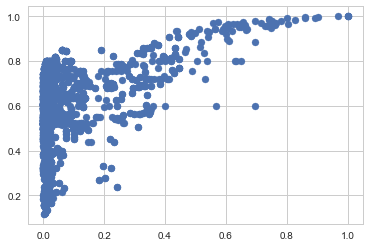

In [20]:

plt.scatter(df.dockQ,df.mm)


Text(0, 0.5, 'dockQ')

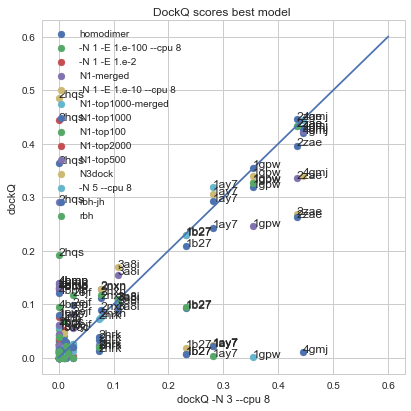

In [46]:
cutoff=0.05
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    if d=="rbh-merged-pdb":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="TMd":continue   


    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

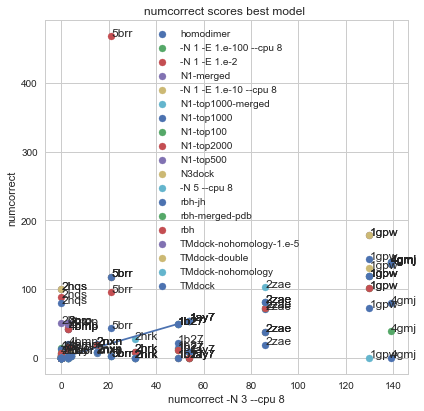

In [22]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d=="pdbcontacts":continue   
    if d=="PDBDOCK":continue   
    if d=="pdbcontacts":continue   
    if d=="pdbcontacts-allintra":continue   
    if d=="PDBDOCK":continue   
    if d=="PDBDOCK2":continue   
    if d=="PDBDOCK3":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

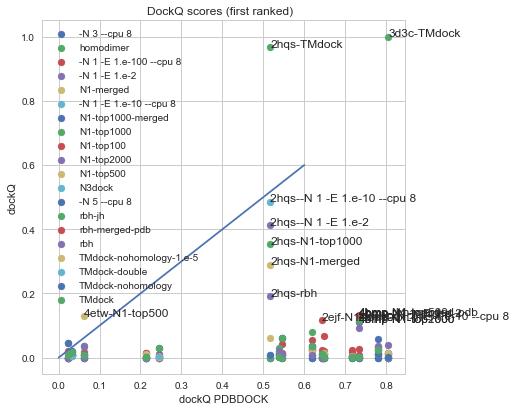

In [23]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    #if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d=="pdbcontacts":continue   
    if d=="PDBDOCK":continue   
    if d=="pdbcontacts":continue   
    if d=="pdbcontacts-allintra":continue   
    if d=="PDBDOCK":continue   
    if d=="PDBDOCK2":continue   
    if d=="PDBDOCK3":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["PDBDOCK"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]+"-"+d
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ PDBDOCK")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

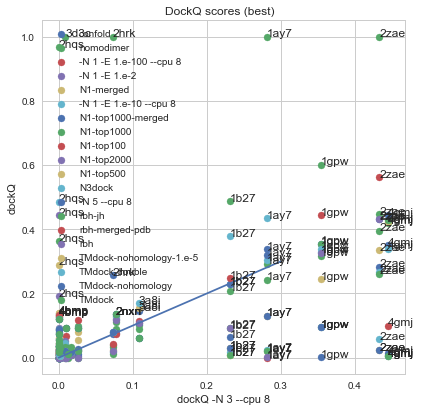

In [24]:
cutoff=0.13
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d=="pdbcontacts":continue   
    if d=="pdbcontacts-allintra":continue   
    if d=="PDBDOCK":continue   
    if d=="PDBDOCK2":continue   
    if d=="PDBDOCK3":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

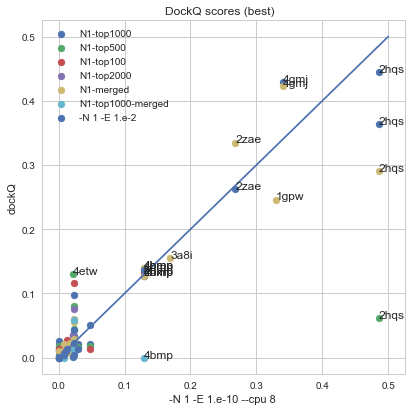

In [68]:
#print(datasets)
cutoff=0.12
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","N1-top500","N1-top100","N1-top2000","N1-merged","N1-top1000-merged","-N 1 -E 1.e-2 "]: # ,"PDBDOCK3"
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["-N 1 -E 1.e-10 --cpu 8 "],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.5]
y=[0,0.5]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("-N 1 -E 1.e-10 --cpu 8 ")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

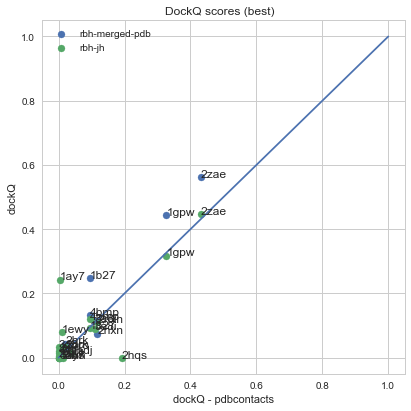

In [69]:
cutoff=0.
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["rbh-merged-pdb","rbh-jh"]: # ,"PDBDOCK3"
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["rbh"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - pdbcontacts")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

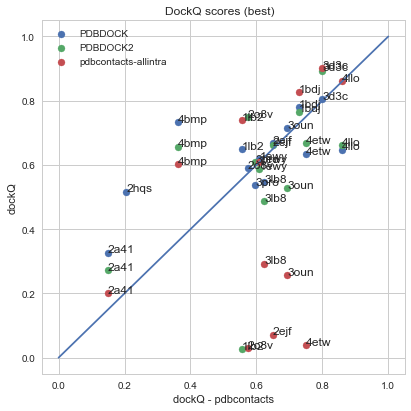

In [48]:
cutoff=0.
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["PDBDOCK","PDBDOCK2","pdbcontacts-allintra"]: # ,"PDBDOCK3"
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - pdbcontacts")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

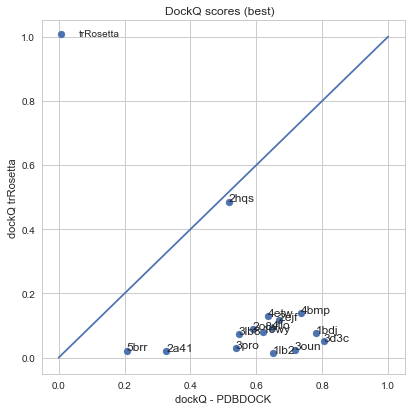

In [26]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["PDBDOCK"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - PDBDOCK")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

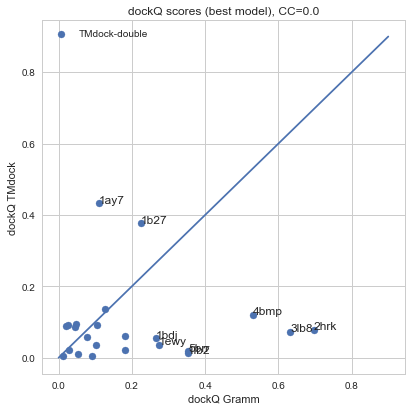

In [44]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [28]:
cutoff=0.05
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


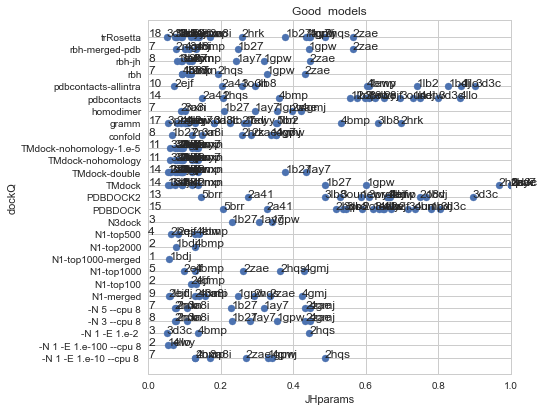

In [49]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

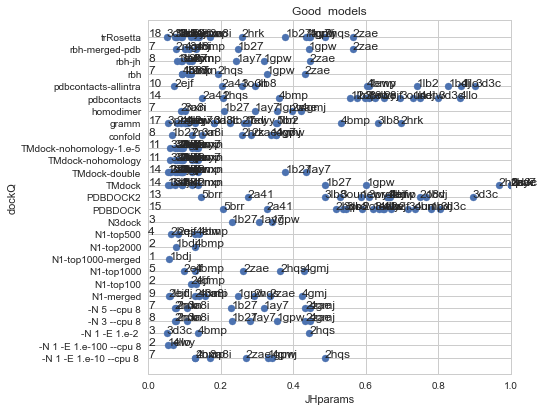

In [49]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

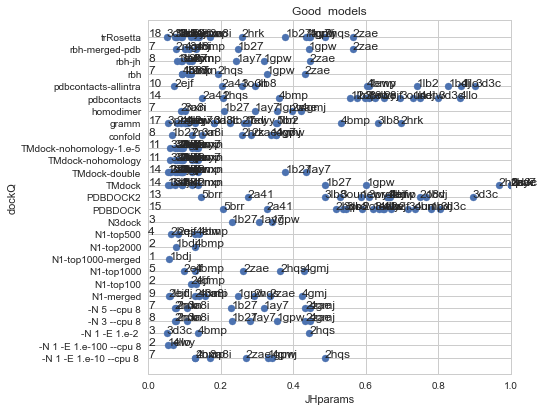

In [49]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

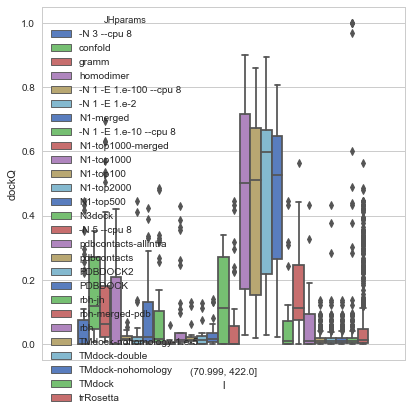

In [50]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.boxplot(x="l", y="dockQ", hue="JHparams",
                    data=df, palette="muted")

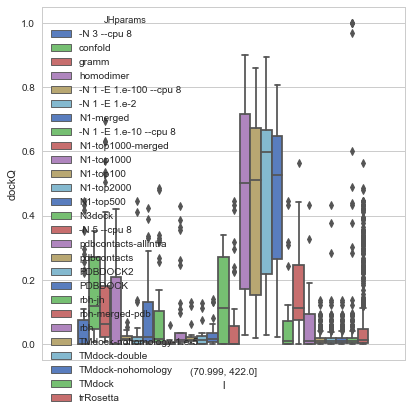

In [50]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.boxplot(x="l", y="dockQ", hue="JHparams",
                    data=df, palette="muted")

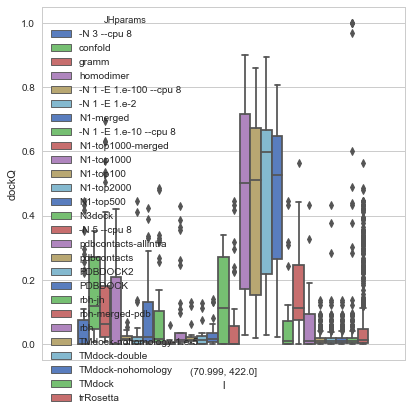

In [50]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.boxplot(x="l", y="dockQ", hue="JHparams",
                    data=df, palette="muted")

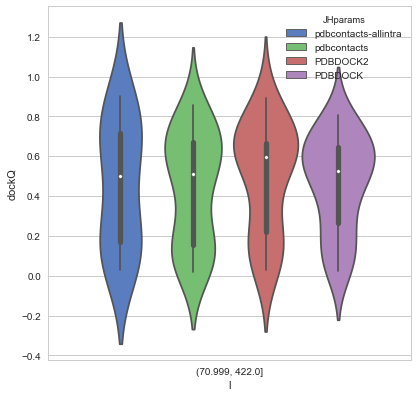

In [51]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)
pdbset=["pdbcontacts","pdbcontacts-allintra","PDBDOCK","PDBDOCK2"] # "PDBDOCK3"
df_merged=df.loc[df.JHparams.isin(pdbset)]

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df_merged, palette="muted")

In [52]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK',
       'rbh-jh', 'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5',
       'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'],
      dtype=object)

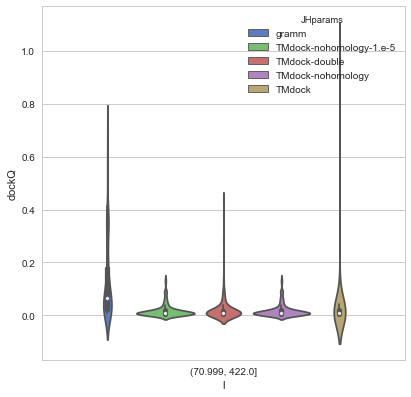

In [53]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)
dockset=["TMdock",'TMdock-nohomology-1.e-5',"TMdock-double","TMdock-nohomology","gramm"] # "PDBDOCK3"
df_merged=df.loc[df.JHparams.isin(dockset)]

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df_merged, palette="muted")

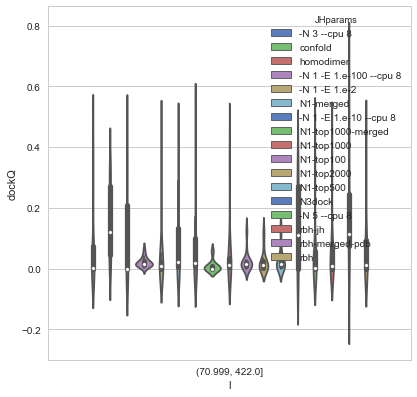

In [56]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)
set=dockset+pdbset+["trRosetta","confold"]
df_merged=df.loc[~df.JHparams.isin(set)]

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df_merged, palette="muted")

/Users/arnee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/arnee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


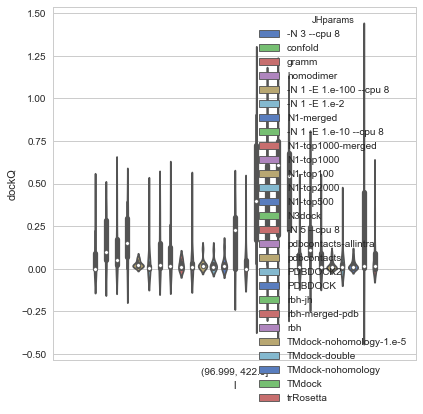

In [32]:
df_first["size"]=pd.qcut(df_first['msa'], q=4)
df_first["l"]=pd.qcut(df_first['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df_first, palette="muted")

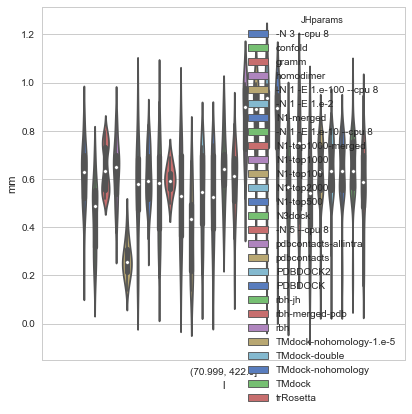

In [33]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="mm", hue="JHparams",
                    data=df, palette="muted")

In [34]:
data_first[datasets[0]]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,rank,code,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.281,0.167,3.557,...,1,1ay7,0.829400,NaN,0.84371,2034,0.81509,1485,53.985,187
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733.0,1484,2034,0.222,0.120,4.427,...,1,1b27,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1,1bdj,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
20,1ewy_u1_A-1ewy_u2_A,-N 3 --cpu 8,304,99,4396.0,63406,25024,0.000,0.000,527.539,...,1,1ewy,0.808450,NaN,0.81359,63406,0.80331,25024,0.000,403
34,1gpw_u1_A-1gpw_u2_A,-N 3 --cpu 8,252,204,7137.0,58466,67629,0.351,0.320,2.939,...,1,1gpw,0.885175,NaN,0.89229,67629,0.87806,58466,119.000,456
56,1lb2_u1_A-1lb2_u2_A,-N 3 --cpu 8,210,82,5979.0,74270,9426,0.000,0.000,356.987,...,1,1lb2,0.735135,NaN,0.80696,9426,0.66331,74270,0.000,292
114,2a41_u1_A-2a41_u2_A,-N 3 --cpu 8,373,259,7970.0,72936,56940,0.002,0.000,83.264,...,1,2a41,0.417175,NaN,0.43009,72936,0.40426,56940,0.000,632
142,2ejf_u1_A-2ejf_u2_A,-N 3 --cpu 8,235,71,7710.0,8748,65732,0.000,0.000,383.250,...,1,2ejf,0.867260,NaN,0.89737,8748,0.83715,65732,0.000,306
152,2hqs_u1_A-2hqs_u2_A,-N 3 --cpu 8,398,109,2460.0,376708,32336,0.000,0.000,687.585,...,1,2hqs,0.879120,NaN,0.90440,376708,0.85384,32336,0.000,507
154,2hrk_u1_A-2hrk_u2_A,-N 3 --cpu 8,181,121,3760.0,18121,4930,0.031,0.022,9.265,...,1,2hrk,0.709645,NaN,0.72697,4930,0.69232,18121,0.000,302


# TEST to do
# First ranked..
# U1 vs U2

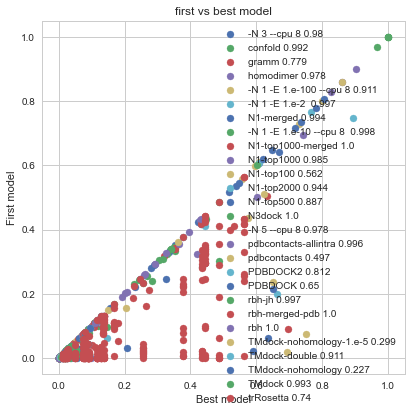

In [35]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    df_merged = pd.merge(data_max[d],data_first[d], on=['code'],how="inner")
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d+" "+str(round(cc[0,1],3)))
ax.set_title("first vs best model")
ax.set_xlabel("Best model")
ax.set_ylabel("First model")
ax.legend()



In [36]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged',
       '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000',
       'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK',
       'rbh-jh', 'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5',
       'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'],
      dtype=object)

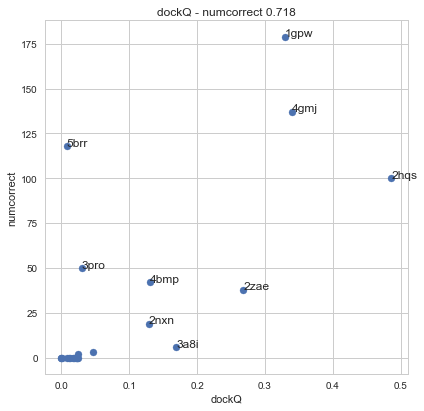

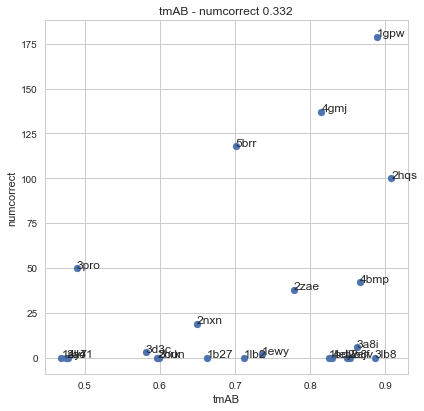

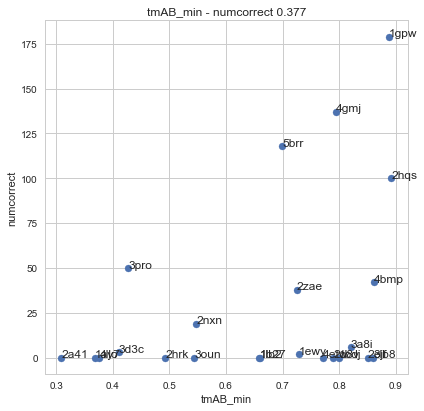

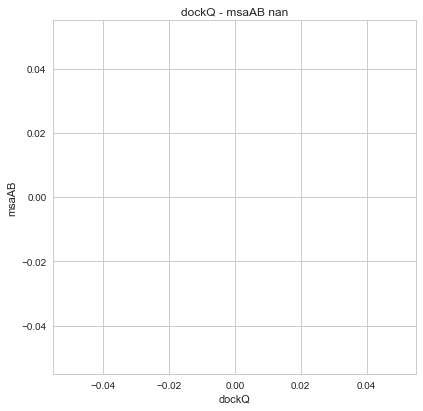

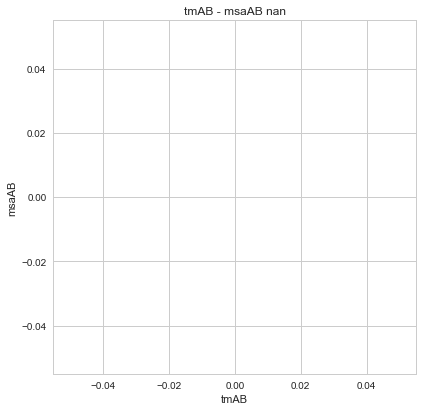

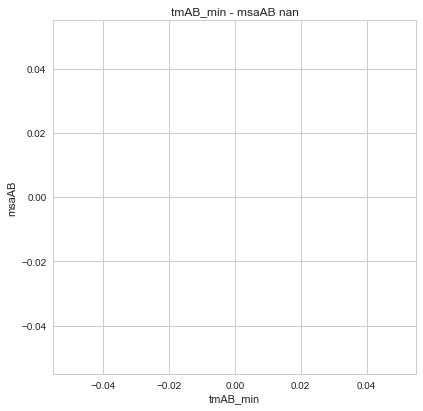

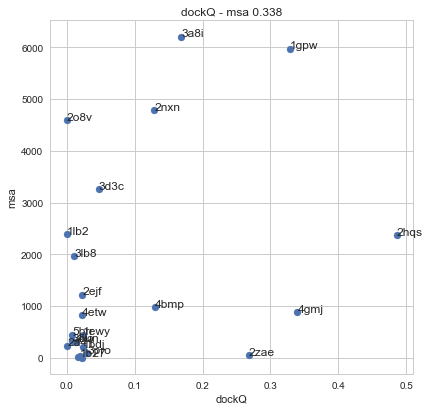

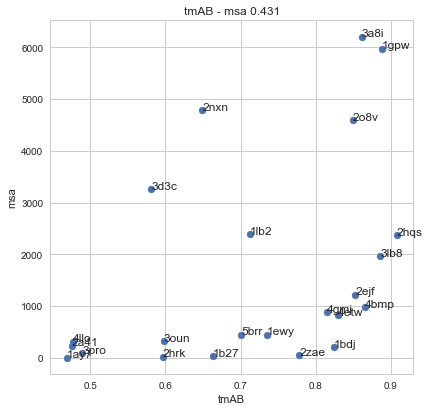

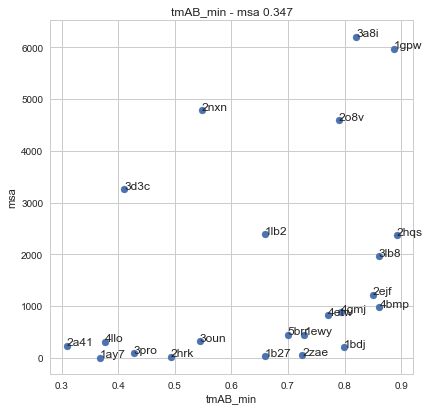

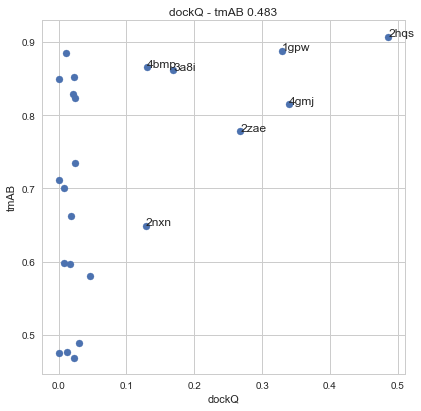

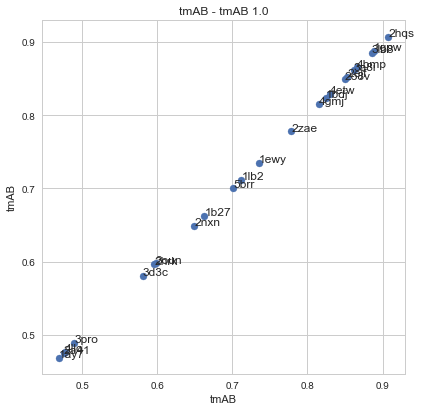

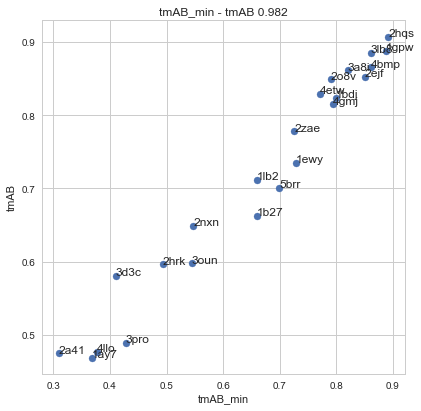

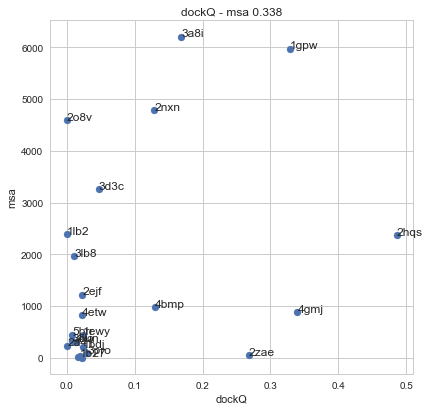

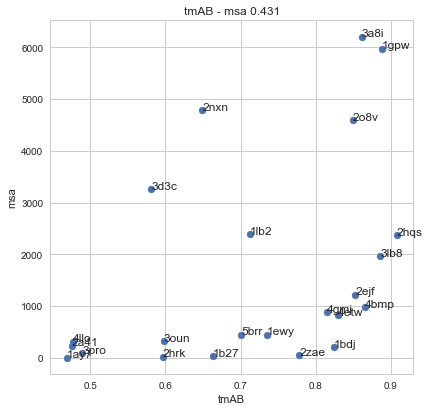

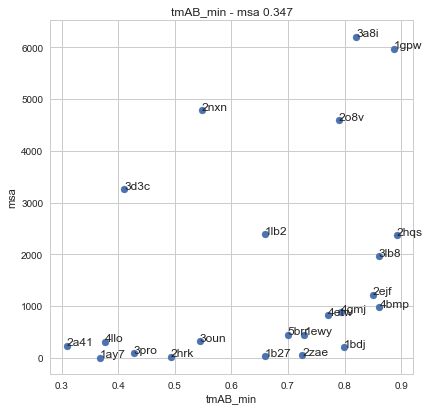

In [37]:
tempdf=data_max['-N 1 -E 1.e-10 --cpu 8 '] 

for y in ["numcorrect","msaAB","msa","tmAB","msa"]:
    for x in ["dockQ","tmAB","tmAB_min","mm",]:
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        xdata=tempdf[x]
        ydata=tempdf[y]
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        plt.scatter(xdata,ydata)
        cc=np.corrcoef(xdata,ydata)
        ax.set_title(x + " - " + y + " " + str(round(cc[0,1],3)))
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        for i, txt in enumerate(tempdf.name):
            sstr=txt[0:4]
            if (xdata[i]>cutoff or ydata[i]>25):
                ax.annotate(sstr, (xdata[i], ydata[i]))
    plt.close()

In [ ]:


r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)

tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns+["confold","rbh-merged-pdb"])]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code'])
best_df.sort_values("JHparams")

In [38]:
import sklearn
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression()


In [40]:
ydata=df.dockQ

In [41]:
xdata=df[["lenA","lenB","msa","long","med","longA","medA","longB","medB"]]


In [42]:
reg.fit(xdata,ydata)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


In [ ]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
